# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

# Make a polynomial datasets

In [16]:
X = 6 * np.random.rand(200, 1) - 3
y =  (X**2) + (2 * X) - (3 + np.random.randn(200, 1))

# y = x^2 + 2x - 3

## Plot Build

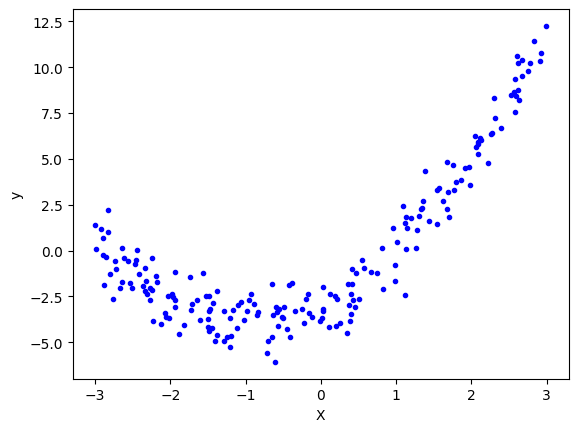

In [17]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Train test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Linear Regression

In [19]:
reg1 = LinearRegression()
reg1.fit(X_train, y_train)
r2_score(y_test, reg1.predict(X_test))

0.5082979916250971

In [20]:
reg1.intercept_, reg1.coef_

(array([0.24081755]), array([[1.75632292]]))

## Linear Regression Best Fit Line

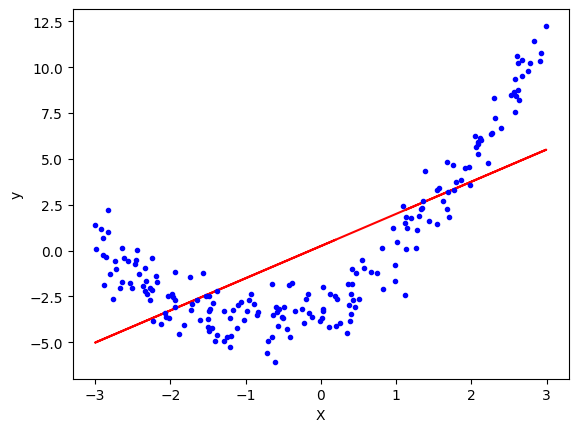

In [21]:
plt.plot(X_train,reg1.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Apply Polynomial Transformation

In [22]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True) #bias = X^0=1 skip or not

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [24]:
print(X_train[0])
print(X_train_trans[0])

[1.14189837]
[1.         1.14189837 1.30393189]


# Apply LinearRegression on transformer column

In [25]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [26]:
r2_score(y_test, lr.predict(X_test_trans))

0.943823123429842

In [27]:
print(lr.coef_)
print(lr.intercept_)

[[0.         1.93212176 1.02975973]]
[-2.9997752]


# Draw the polynomial line

In [28]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

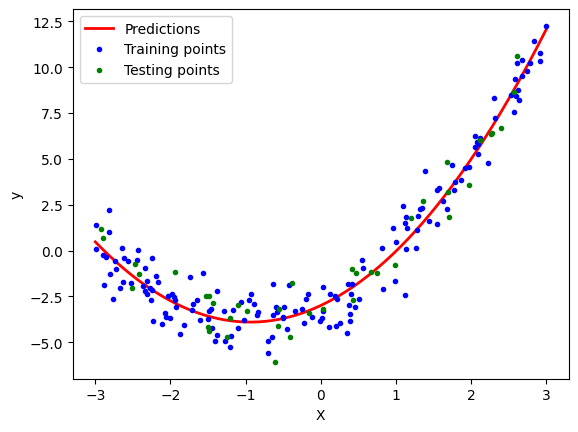

In [29]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Make a function for doing this process

In [41]:
def polynomial_regression(degree):
    plt.figure(figsize=(10,5))
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    # plt.axis([-3, 3, 0, 10])
    plt.show()

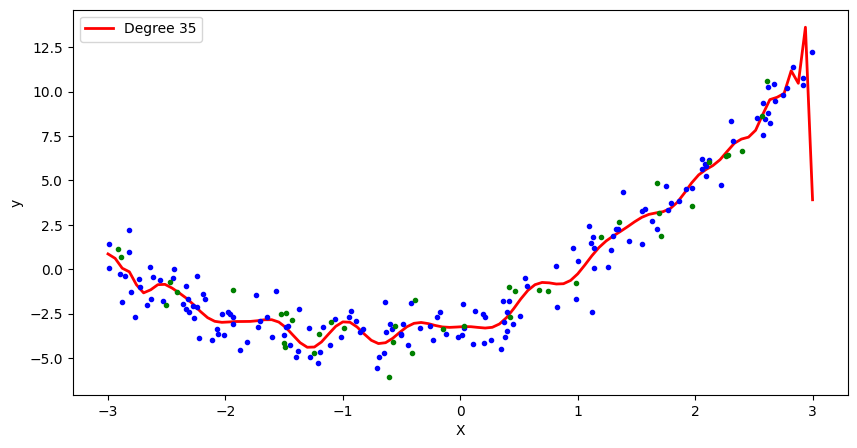

In [45]:
polynomial_regression(35)

In [46]:
poly.powers_

array([[0],
       [1],
       [2]])

# Applying Gradient Descent

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


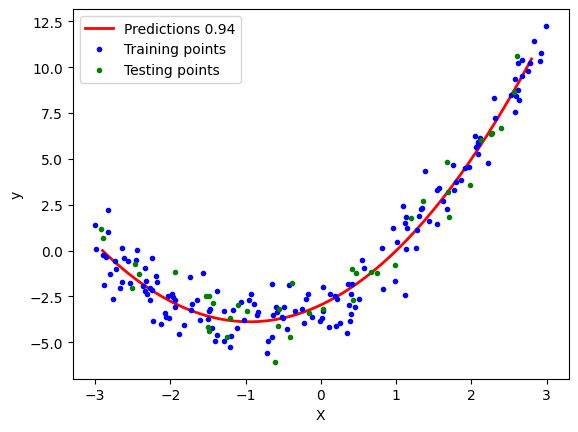

In [47]:
poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()